In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from Where import *

Loading accuracy... min, max= 0.0145 0.9852


## Réseau de neurones

### Lancer l'apprentissage ou charger les données

In [3]:
path = '2018-05-31_classification_BCELoss_test.pt'

In [4]:
!ls -l {path}
#!rm {path}

-rw-r--r--  1 laurentperrinet  staff  5093285 May 31 16:31 2018-05-31_classification_BCELoss_test.pt


In [5]:
if os.path.isfile(path):
    net.load_state_dict(torch.load(path))
    print('Loading file', path)
else:
    print('Training model...')
    N_epochs = 100
    for epoch in range(N_epochs):          #max number of training epochs
        net = train(net, minibatch_size)                 #starting the learning
        torch.save(net.state_dict(), path) #save the neural network state
        print('Model saved at', path)

Training model...
Starting training...
[0/60000] Loss: 0.6931068897247314 Time: 0.01 mn
[10000/60000] Loss: 0.6204805374145508 Time: 1.46 mn
[20000/60000] Loss: 0.38403281569480896 Time: 3.02 mn
[30000/60000] Loss: 0.3728407025337219 Time: 4.65 mn
[40000/60000] Loss: 0.3724234998226166 Time: 6.28 mn
[50000/60000] Loss: 0.3686811029911041 Time: 7.90 mn
Model saved at 2018-05-31_classification_BCELoss_test.pt


In [6]:
(data, label) = next(iter(data_loader))

In [7]:
idx = 0
print(data[idx, 0, :, :].shape)

torch.Size([28, 28])


In [8]:
retina = vectorization(N_theta, N_azimuth, N_eccentricty, N_phase, N_X, N_Y, rho)


### Lancer l'évaluation

Stimulus position: (-10,-2)
Position prediction: (-14.0,3.0)
**************************************************


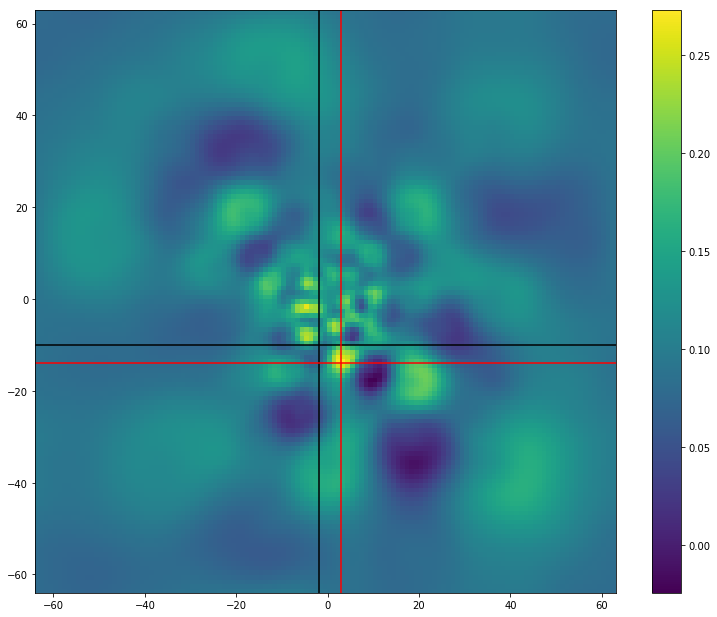

Stimulus position: (-8,-4)
Position prediction: (-5.0,4.0)
**************************************************


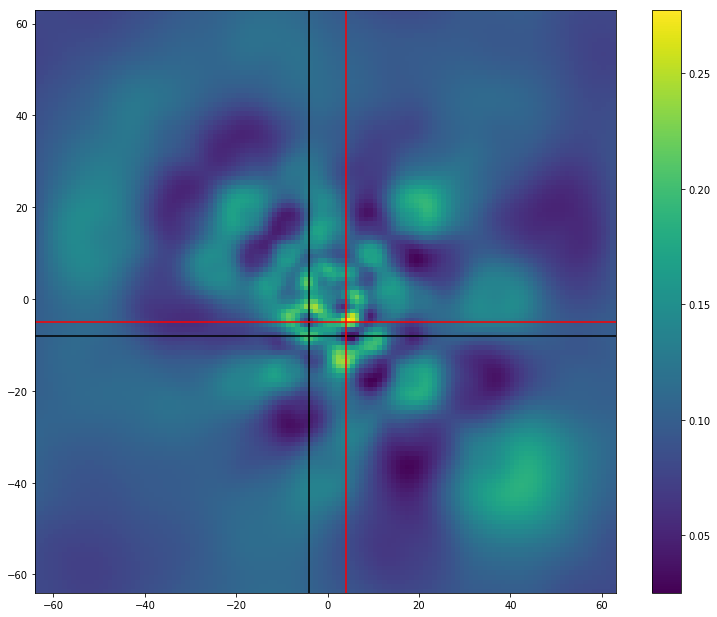

Stimulus position: (1,-10)
Position prediction: (4.0,-1.0)
**************************************************


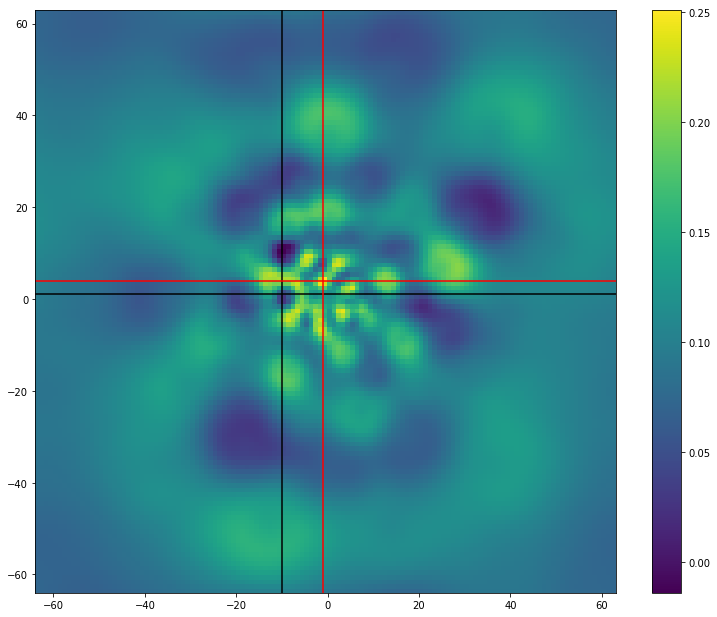

Stimulus position: (12,9)
Position prediction: (-10.0,-8.0)
**************************************************


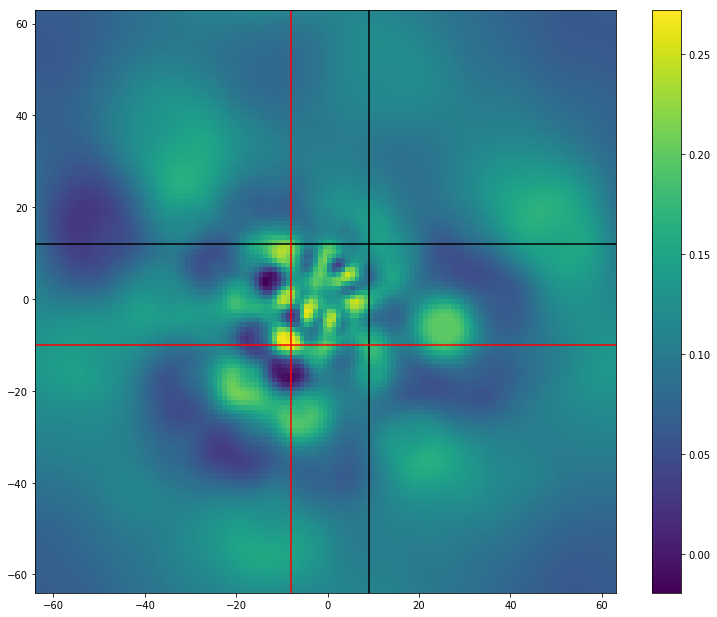

Stimulus position: (-11,-9)
Position prediction: (-5.0,4.0)
**************************************************


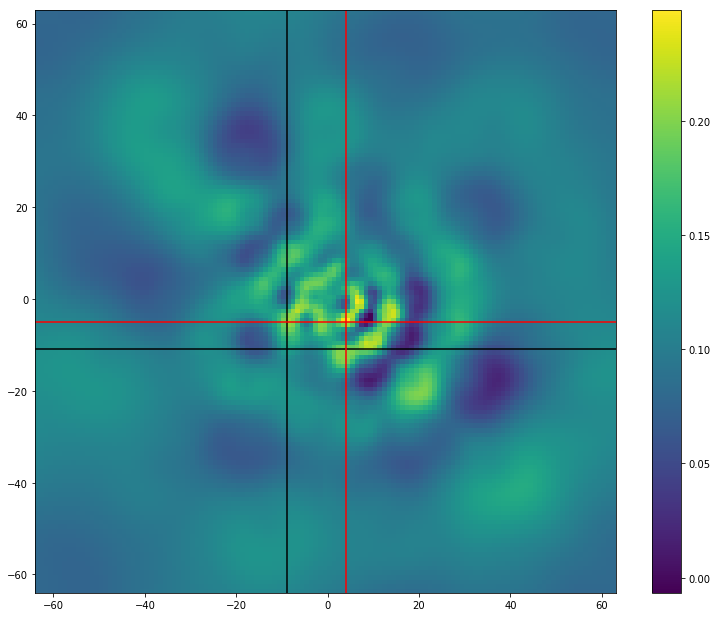

Stimulus position: (0,-9)
Position prediction: (-5.0,-9.0)
**************************************************


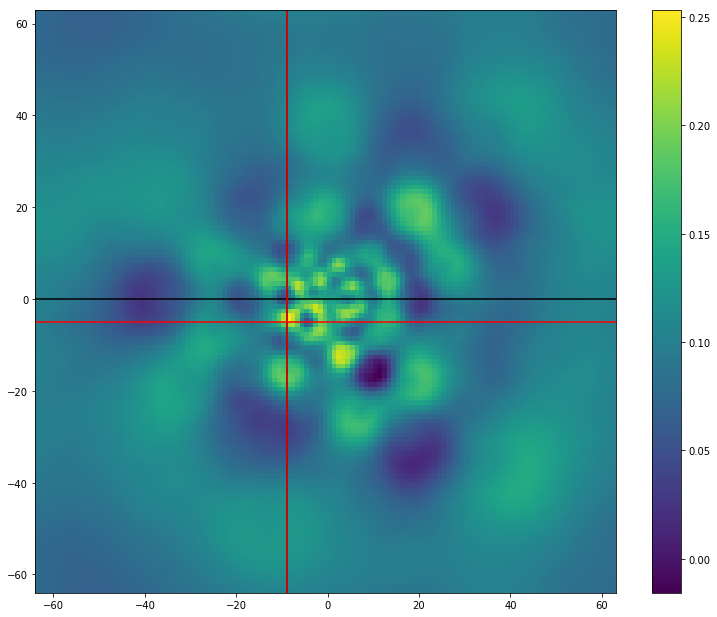

Stimulus position: (-24,6)
Position prediction: (2.0,-7.0)
**************************************************


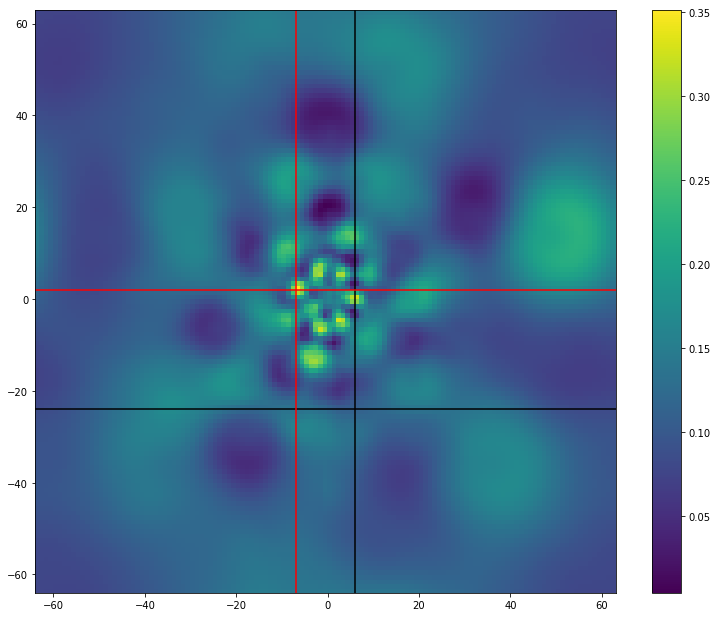

Stimulus position: (10,25)
Position prediction: (-4.0,9.0)
**************************************************


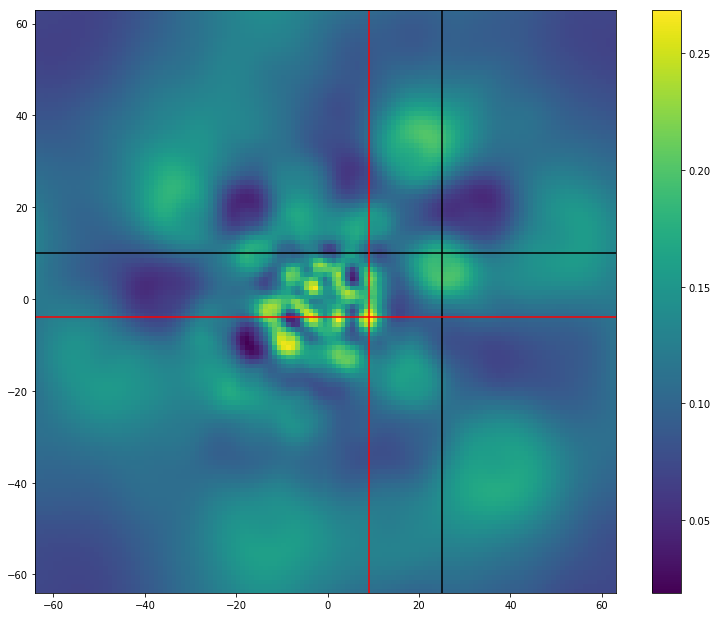

Stimulus position: (-5,8)
Position prediction: (-2.0,3.0)
**************************************************


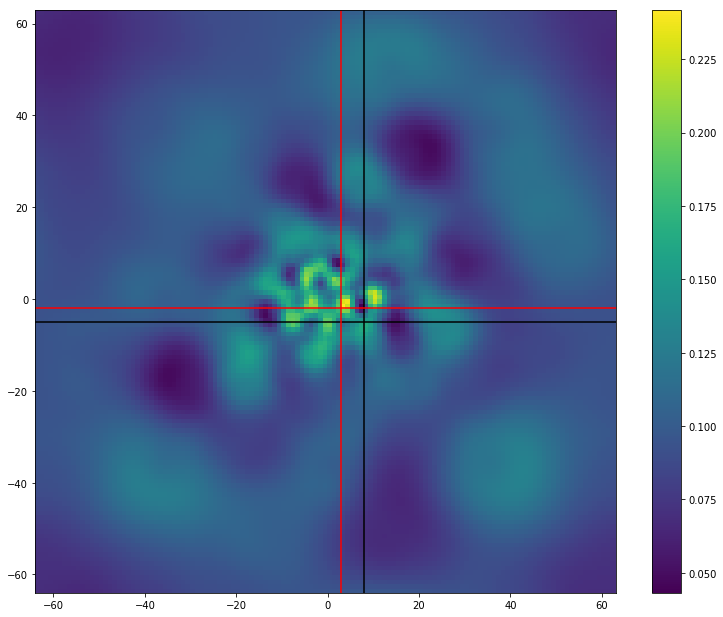

Stimulus position: (-8,3)
Position prediction: (-2.0,3.0)
**************************************************


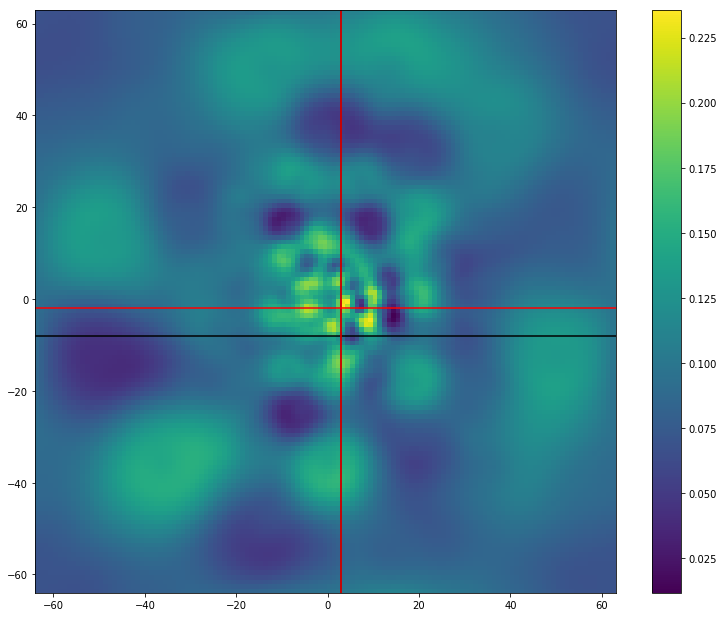

In [9]:
N_test = 10

for _ in range(N_test):
    eval_sacc()
    plt.show()    

Stimulus position: (-14,-4)
Loading pred_data... min, max= 0.097165495 0.16959472
a_data position (log_r, azimuth) = (0.3573084205152942,-1.2924966677897853)
**************************************************


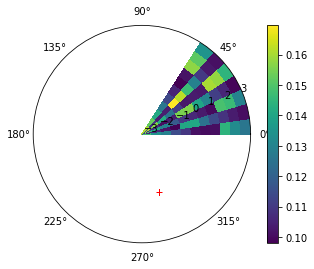

Stimulus position: (9,-9)
Loading pred_data... min, max= 0.10044821 0.16736814
a_data position (log_r, azimuth) = (0.3304094265713313,0.7853981633974483)
**************************************************


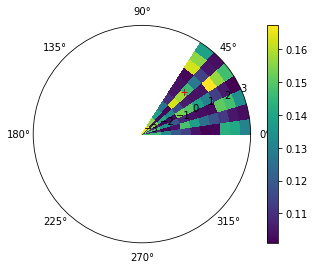

Stimulus position: (1,3)
Loading pred_data... min, max= 0.09381272 0.16108947
a_data position (log_r, azimuth) = (0.05190830234749755,-0.3217505543966422)
**************************************************


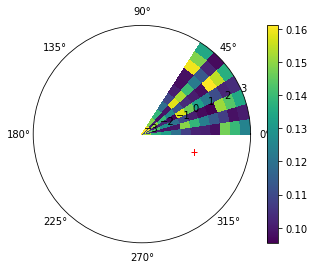

Stimulus position: (0,-14)
Loading pred_data... min, max= 0.09852269 0.16729125
a_data position (log_r, azimuth) = (0.34946125897114466,-0.0)
**************************************************


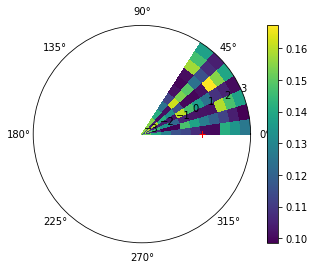

Stimulus position: (0,-9)
Loading pred_data... min, max= 0.09472261 0.16024141
a_data position (log_r, azimuth) = (0.2610947085153368,-0.0)
**************************************************


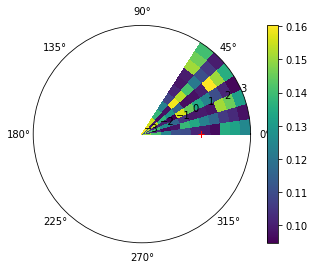

Stimulus position: (-12,-12)
Loading pred_data... min, max= 0.09756017 0.16542514
a_data position (log_r, azimuth) = (0.3879458410616875,-0.7853981633974483)
**************************************************


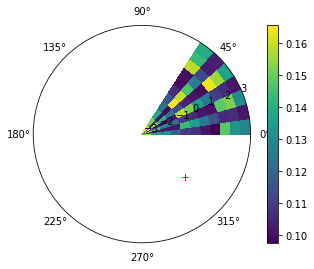

Stimulus position: (-15,8)
Loading pred_data... min, max= 0.095911935 0.16319011
a_data position (log_r, azimuth) = (0.3882924618593362,1.0808390005411683)
**************************************************


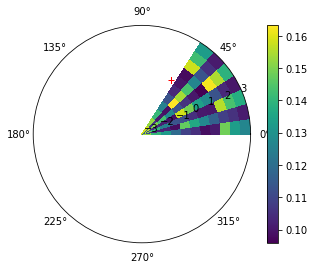

Stimulus position: (-13,8)
Loading pred_data... min, max= 0.099186406 0.16534287
a_data position (log_r, azimuth) = (0.366753638404663,1.0191413442663497)
**************************************************


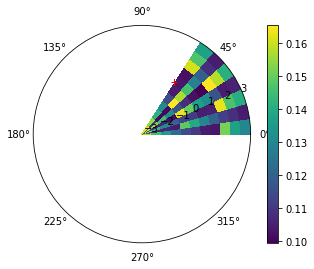

Stimulus position: (14,16)
Loading pred_data... min, max= 0.10796815 0.1819911
a_data position (log_r, azimuth) = (0.4330180110313161,-0.7188299996216245)
**************************************************


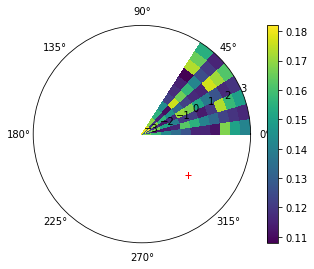

Stimulus position: (-25,2)
Loading pred_data... min, max= 0.10703497 0.17611912
a_data position (log_r, azimuth) = (0.466062918718137,1.4909663410826592)
**************************************************


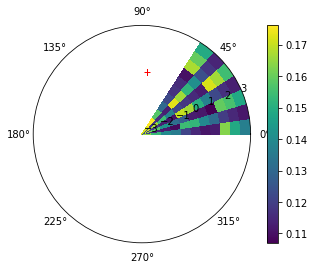

In [10]:
for _ in range(N_test):
    eval_sacc(fig_type='log')
    plt.show()    

In [11]:
eccentricty, azimuth = np.meshgrid(np.linspace(0, 1, N_eccentricty+1), np.linspace(-np.pi, np.pi, N_azimuth+1))
eccentricty.shape, azimuth.shape

((13, 9), (13, 9))

In [12]:
help(plt.pcolor
    )

Help on function pcolor in module matplotlib.pyplot:

pcolor(*args, **kwargs)
    Create a pseudocolor plot of a 2-D array.
    
    Call signatures::
    
        pcolor(C, **kwargs)
        pcolor(X, Y, C, **kwargs)
    
    pcolor can be very slow for large arrays; consider
    using the similar but much faster
    :func:`~matplotlib.pyplot.pcolormesh` instead.
    
    Parameters
    ----------
    C : array_like
        An array of color values.
    
    X, Y : array_like, optional
        If given, specify the (x, y) coordinates of the colored
        quadrilaterals; the quadrilateral for ``C[i,j]`` has corners at::
    
            (X[i,   j],   Y[i,   j]),
            (X[i,   j+1], Y[i,   j+1]),
            (X[i+1, j],   Y[i+1, j]),
            (X[i+1, j+1], Y[i+1, j+1])
    
        Ideally the dimensions of ``X`` and ``Y`` should be one greater
        than those of ``C``; if the dimensions are the same, then the last
        row and column of ``C`` will be ignored.
    
    